# Review

In [1]:
import cv2
import os
import glob

import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('./fig/PD_MRI.jpeg')

if img is None:
    print('image read failed')
    sys.exit()
    
cv2.namedWindow('image')
cv2.imshow('image',img)

while True:
    kw = cv2.waitKey()
    if kw==27 or kw==ord('q'):
        break
        
cv2.destroyAllWindows()

In [3]:
img_lists = glob.glob('./fig/my_images/*.*')

cv2.namedWindow('scene', cv2.WINDOW_NORMAL)
cv2.setWindowProperty('scene', cv2.WND_PROP_FULLSCREEN,
                      cv2.WINDOW_FULLSCREEN)

idx=0
while True:
    img = cv2.imread(img_lists[idx])
    
    if img is None:
        print('image read failed')
        break
        
    cv2.imshow('scene', img)
    
    if cv2.waitKey(3000) ==27:
        break
    
    idx+=1
    if idx >= len(img_lists):
        idx=0
        
cv2.destroyAllWindows()

In [7]:
src = cv2.imread('./fig/airplane.bmp')
mask = cv2.imread('./fig/mask_plane.bmp', 0)
dst = cv2.imread('./fig/field.bmp')

if src is None or mask is None or dst is None:
    print('image read failed')
    sys.exit()

dst1 = cv2.copyTo(src, mask)
cv2.copyTo(src, mask, dst)

cv2.imshow('src', src)
cv2.imshow('mask', mask)
cv2.imshow('dst', dst)
cv2.imshow('dst1', dst1)

cv2.waitKey()
cv2.destroyAllWindows()

In [15]:
img = np.full((600, 1200, 3), (255, 255, 255), np.uint8)

cv2.line(img, (50, 50), (300, 50), (0,0,255), 4, cv2.LINE_8)
cv2.arrowedLine(img, (300, 50), (300, 200), (0,0,255), 4, cv2.LINE_8)
cv2.rectangle(img, (50, 400), (200, 500), (0,0,255), 4)
cv2.rectangle(img, (100, 450, 100, 100), (255,0,255), -1)
cv2.circle(img, (300,300), 100, (255,0,0), 3, cv2.LINE_AA)
cv2.putText(img, 'OpenCV', (400, 500), cv2.FONT_HERSHEY_SCRIPT_COMPLEX,
           0.8, (0,0,255), 1, cv2.LINE_AA)

cv2.imshow('img', img)

cv2.waitKey()
cv2.destroyAllWindows()

In [18]:
cap = cv2.VideoCapture(0)

if not cap.isOpened:
    print('Video open failed')
    sys.exit()
    
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS)*7)
fourcc = cv2.VideoWriter_fourcc(*'DIVX')

out = cv2.VideoWriter('output.avi', fourcc, fps, (w,h))

while True:
    ret, frame = cap.read()
    
    if not ret:
        print('video read failed')
        break
    
    blur = cv2.GaussianBlur(frame, (0,0), 3)
    edge = cv2.Canny(frame, 50, 150)
    out.write(blur)
    
    cv2.imshow('frame',frame)
    cv2.imshow('edge', edge)
    cv2.imshow('blur', blur)
    
    kw = cv2.waitKey(30)
    if kw==27:
        break
    elif kw==ord('i'):
        inv = 255 - edge
    elif kw==ord('s'):
        cv2.imwrite('my_photo.png', blur)
        
cap.release()
out.release()
cv2.destroyAllWindows()

In [19]:
def call_mouse(event, x,y, flags, params):
    global oldx, oldy
    
    if event == cv2.EVENT_LBUTTONDOWN:
        print('left button down:', x,y)
        oldx, oldy = x,y
    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx,oldy), (x,y), (0,0,255),
                    4, cv2.LINE_AA)
            cv2.imshow('image', img)
            oldx, oldy = x,y

            
img = np.ones((500,700,3), np.uint8)*255

cv2.namedWindow('image')
cv2.setMouseCallback('image', call_mouse, img)

cv2.imshow('image', img)

cv2.waitKey()
cv2.destroyAllWindows()

left button down: 117 136


In [22]:
def call_track(pos):
    print(pos)
    img[:] = img1*(pos/255)
    cv2.imshow('image', img)

img = cv2.imread('./fig/cat.bmp', 0)
if img is None:
    print("image read failed")
    sys.exit()

img1 = img.copy()
cv2.imshow('image', img)
cv2.createTrackbar('level', 'image', 0, 255, call_track)

cv2.waitKey()
cv2.destroyAllWindows()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
36
39
40
41
42
43
44
45
46
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
80
81
82
83
85
87
88
89
91
92
93
95
97
98
100
102
103
105
106
108
109
111
113
115
118
120
122
125
127
129
132
134
136
137
139
141
144
146
148
150
154
156
158
160
162
165
167
169
172
174
177
180
182
184
186
188
191
193
195
198
200
203
206
210
214
216
219
221
222
223
225
226
227
228
229
230
231
232
233
234
235
237
238
240
241
242
243
244
245
247
248
249
251
253
254
255
254
252
250
248
246
244
241
238
235
233
231
229
226
224
222
220
218
215
212
209
204
200
196
191
187
181
175
171
167
164
161
158
156
154
152
149
147
146
144
141
140
138
136
134
133
131
129
127
126
125
123
122
120
119
117
116
114
112
111
110
108
107
105
103
101
100
98
96
94
92
90
87
86
83
82
80
79
77
75
74
72
71
68
67
65
63
62
60
59
57
55
53
51
49
48
45
43
41
39
37
35
34
33
31
30
29
27
26
24
23
22
20
19
18
17
16
15


In [25]:
src1 = cv2.imread('./fig/lenna256.bmp', 0)
src2 = np.zeros((256,256), np.uint8)
cv2.circle(src2, (128,128), 100, 200, -1)
cv2.circle(src2, (128,128), 50, 50, -1)

dst1 = cv2.add(src1, src2)
dst2 = cv2.addWeighted(src1, 0.5, src2, 0.5, 0.)
dst3 = cv2.subtract(src2, src1)
dst4 = cv2.absdiff(src1, src2)

cv2.imshow('src1', src1)
cv2.imshow('src2', src2)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.imshow('dst3', dst3)
cv2.imshow('dst4', dst4)


cv2.waitKey()
cv2.destroyAllWindows()

In [27]:
img = cv2.imread("./fig/flowers.jpg")
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

b,g,r = cv2.split(img)
h,s,v = cv2.split(img_hsv)

cv2.imshow('b', b)
cv2.imshow('g', g)
cv2.imshow('r', r)
cv2.imshow('h', h)
cv2.imshow('s', s)
cv2.imshow('v', v)

cv2.waitKey()
cv2.destroyAllWindows()

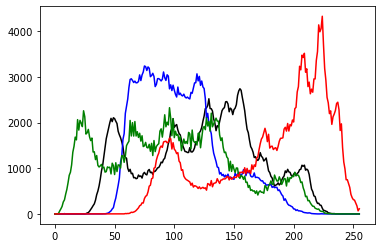

In [30]:
src = cv2.imread('./fig/lenna.bmp', 1)
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

hist = cv2.calcHist([src_gray], [0], None, [256], [0,256])
hist_b = cv2.calcHist([src], [0], None, [256], [0,256])
hist_g = cv2.calcHist([src], [1], None, [256], [0,256])
hist_r = cv2.calcHist([src], [2], None, [256], [0,256])

cv2.imshow('src', src)

plt.plot(hist, c='k')
plt.plot(hist_b, c='b')
plt.plot(hist_g, c='g')
plt.plot(hist_r, c='r')

plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

0.0 255.0


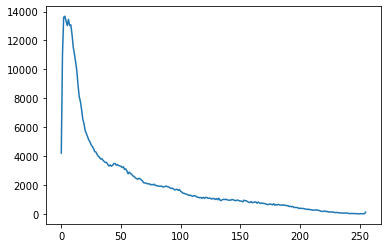

In [37]:
# src = cv2.imread('./fig/puppy_shrink.png', 0)
src = cv2.imread('./fig/manjang.jpg', 0)

smin, smax, _, _ = cv2.minMaxLoc(src)
print(smin, smax)

dst_norm_cv = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX, -1)
dst_norm = np.clip((src-smin)/(smax-smin)*255 + 0.,0,255).astype(np.uint8)
dst_equal = cv2.equalizeHist(src)
hist = cv2.calcHist([src],[0],None,[256],[0,256])

cv2.imshow('src',src)
cv2.imshow('dst_norm',dst_norm)
cv2.imshow('dst_norm_cv',dst_norm_cv)
cv2.imshow('dst_equal',dst_equal)


plt.plot(hist)
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

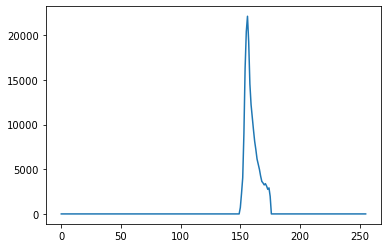

In [44]:
img = cv2.imread("./fig/flowers.jpg", 0)

src = np.clip(img/10+150,0,255).astype(np.uint8)
norm = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX)
equal = cv2.equalizeHist(src)


hist = cv2.calcHist([src],[0],None,[256],[0,256])

plt.plot(hist)
plt.show()

cv2.imshow('src', src)
cv2.imshow('norm', norm)
cv2.imshow('equal', equal)


cv2.waitKey()
cv2.destroyAllWindows()

In [60]:
img = cv2.imread('./fig/spring_in_park.jpg', cv2.IMREAD_REDUCED_COLOR_2)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

h,s,v = cv2.split(img_hsv)

norm = cv2.normalize(v, None, 0,255, cv2.NORM_MINMAX,-1)
img_norm_hsv = cv2.merge((h,s,norm))
img_norm = cv2.cvtColor(img_norm_hsv, cv2.COLOR_HSV2BGR)

equal = cv2.equalizeHist(v)
img_equal_hsv = cv2.merge((h,s,equal))
img_equal = cv2.cvtColor(img_equal_hsv, cv2.COLOR_HSV2BGR)

gaussian = cv2.GaussianBlur(equal, (0,0), 1)
img_gaussian_hsv = cv2.merge((h,s,gaussian))
img_gaussian = cv2.cvtColor(img_gaussian_hsv, cv2.COLOR_HSV2BGR)


cv2.imshow('img', img)
cv2.imshow('img_norm', img_norm)
cv2.imshow('img_equal', img_equal)
cv2.imshow('img_gaussian', img_gaussian)


cv2.waitKey()
cv2.destroyAllWindows()

In [64]:
cap = cv2.VideoCapture(0)

f_flag = False
i_flag = False

while True:
    ret, frame = cap.read()
    if ret is None:
        print('Video read failed')
        break

    if f_flag:
        frame = cv2.flip(frame, 1)
    if i_flag:
        frame = cv2.Canny(frame, 50, 150)
        
    cv2.imshow('image', frame)
    
    kw = cv2.waitKey(20)
    if kw==27:
        break
    elif kw==ord('f'):
        f_flag = not f_flag
    elif kw==ord('i'):
        i_flag = not i_flag
            
        
cap.release()
cv2.destroyAllWindows()

In [71]:
src = cv2.imread('./fig/palette.png',
                 cv2.IMREAD_REDUCED_COLOR_2)
src_dark = cv2.imread('./fig/palette_dark.png',
                     cv2.IMREAD_REDUCED_COLOR_2)

if src is None or src_dark is None:
    print('image read failed')
    sys.exit()
    
dst_bgr = cv2.inRange(src, (0,150,0), (100,255,100))
dst_bgr_dark = cv2.inRange(src_dark, (0,150,0), (100,255,100))

cv2.imshow('src', src)
cv2.imshow('dst_bgr', dst_bgr)
cv2.imshow('src_dark', src_dark)
cv2.imshow('dst_bgr_dark', dst_bgr_dark)


cv2.waitKey()
cv2.destroyAllWindows()

In [83]:
src = cv2.imread('./fig/palette.png',
                 cv2.IMREAD_REDUCED_COLOR_2)
src_dark = cv2.imread('./fig/palette_dark.png',
                     cv2.IMREAD_REDUCED_COLOR_2)

if src is None or src_dark is None:
    print('image read failed')
    sys.exit()
    
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
src_hsv_dark = cv2.cvtColor(src_dark, cv2.COLOR_BGR2HSV)
    
dst_bgr = cv2.inRange(src_hsv, (110,230,150), (130,255,255))
dst_bgr_dark = cv2.inRange(src_hsv_dark, (110,230,150), (130,255,255))

cv2.imshow('src', src)
cv2.imshow('dst_bgr', dst_bgr)
cv2.imshow('src_dark', src_dark)
cv2.imshow('dst_bgr_dark', dst_bgr_dark)


cv2.waitKey()
cv2.destroyAllWindows()

In [85]:
def call_trackbar(pos):
    hmin = cv2.getTrackbarPos('H_min', 'src')
    hmax = cv2.getTrackbarPos('H_max', 'src')
    
    dst = cv2.inRange(src_hsv, (hmin, 150, 150), (hmax, 255, 255))
    cv2.imshow('src', dst)
    

src = cv2.imread('./fig/palette_dark.png', cv2.IMREAD_REDUCED_COLOR_2)
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

cv2.namedWindow('src')
cv2.createTrackbar('H_min','src', 0, 179, call_trackbar)
cv2.createTrackbar('H_max','src', 50, 179, call_trackbar)

cv2.imshow('src', src)
cv2.imshow('src`', src)

cv2.waitKey()
cv2.destroyAllWindows()

In [118]:
def call_trackbar(pos):
    l_min = cv2.getTrackbarPos('level_min','src')
    l_max = cv2.getTrackbarPos('level_max','src')
    i_mask = cv2.inRange(src_hsv, (50,l_min,110),(70,l_max,255))
    mask = 255-i_mask
    
    h,w = mask.shape[:2]
    r,c = 210,100
    crop = dst_re[r:r+h, c:c+w].copy()
    cv2.copyTo(src_cut, mask, crop)
    
    cv2.imshow('src', mask)
    cv2.imshow('dst', crop)
    

src = cv2.imread('./fig/chromakey.png')
dst = cv2.imread('./fig/autumn.jpg')
if src is None or dst is None:
    print('image read failed')
    sys.exit()
    
src_cut = src[100:-5,:-5].copy()    
src_hsv = cv2.cvtColor(src_cut, cv2.COLOR_BGR2HSV)
dst_re = cv2.resize(dst, (1500,880), interpolation=cv2.INTER_AREA)
i_mask = cv2.inRange(src_hsv, (50,0,100),(70,255,255))
mask = 255-i_mask

h,w = mask.shape[:2]
print(h,w)
r,c = 210,100
crop = dst_re[r:r+h, c:c+w]
cv2.copyTo(src_cut, mask, crop)
# cv2.copyTo(crop, i_mask, src_cut) # 크기가 같을 경우

cv2.namedWindow('src')
cv2.createTrackbar('level_min', 'src', 0,255, call_trackbar)
cv2.createTrackbar('level_max', 'src', 10,255, call_trackbar)
cv2.imshow('src',src_cut)
cv2.imshow('dst',dst_re)

cv2.waitKey()
cv2.destroyAllWindows()

641 1275
